<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions applied to Fibonacci matrix and a matrix with a eigenvalue with multiplicity greater than 1.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a

from commons import *
from matrix_functions import *
from sequences import *
import functions_catalog

init_printing()

# Fibonacci matrix

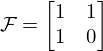

In [2]:
F = define(Symbol(r'\mathcal{F}'), Matrix([[1, 1], [1, 0]]))
F

In [3]:
m = F.rhs.rows

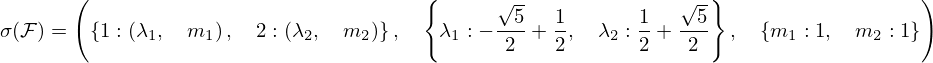

In [4]:
eigendata = spectrum(F)
eigendata

In [5]:
data, eigenvals, multiplicities = eigendata.rhs

In [6]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

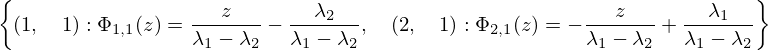

In [7]:
Phi_polynomials = component_polynomials(eigendata)
Phi_polynomials

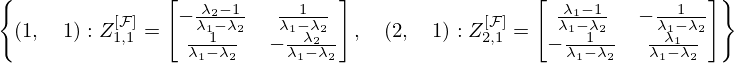

In [8]:
cmatrices = component_matrices(F, Phi_polynomials)
cmatrices

In [9]:
Z_11 = cmatrices[1,1].rhs

In [13]:
assert (F.rhs * Z_11 - Z_11 * F.rhs).simplify() == zeros(2)

In [14]:
assert (Z_11*Z_11 - Z_11).subs(eigenvals).applyfunc(simplify) == zeros(2)

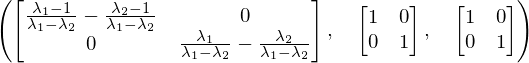

In [12]:
Zi1 = list(cm.rhs.as_immutable() for (i, j), cm in cmatrices.items() if j == 1)

s = zeros(m)
for Z in Zi1:
    s += Z
s, s.simplify(), s.subs(eigenvals).applyfunc(simplify)

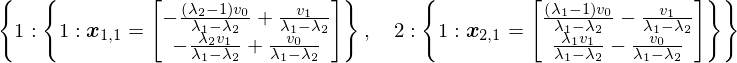

In [14]:
v = IndexedBase('v')
v_vector = Matrix(m, 1, lambda i, _: v[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(v_vector)
M_space_v

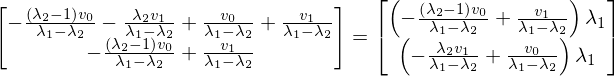

In [15]:
i = 1
eq = Eq(F.rhs*M_space_v[i][1].rhs, M_space_v[i][1].rhs.applyfunc(lambda k: k * data[i][0]))
eq

In [33]:
assert (eq.lhs.applyfunc(lambda i: i.subs(eigenvals).ratsimp()) == 
        eq.rhs.applyfunc(lambda i: i.subs(eigenvals).ratsimp()))

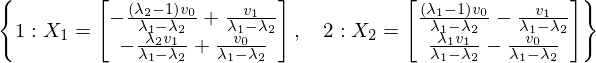

In [19]:
GEs = generalized_eigenvectors_matrices(M_space_v)
GEs # actually, not necessary for Jordan Normal Form computation

In [20]:
relations = generalized_eigenvectors_relations(eigendata)

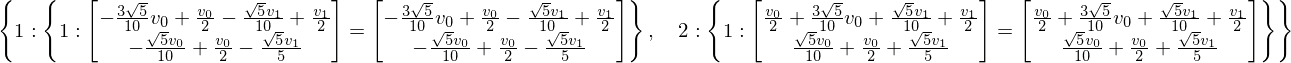

In [29]:
eqs = relations(F.rhs, M_space_v,post=lambda i: i.subs(eigenvals).ratsimp())
eqs

In [23]:
miniblocks = Jordan_blocks(eigendata)
miniblocks

In [25]:
X, J = Jordan_normalform(eigendata, matrices=(F.rhs, M_space_v, miniblocks))

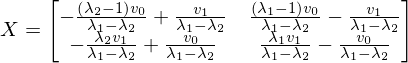

In [26]:
X

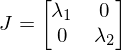

In [27]:
J

In [34]:
assert ((F.rhs*X.rhs).applyfunc(lambda i: i.subs(eigenvals).ratsimp()) ==
        (X.rhs*J.rhs).applyfunc(lambda i: i.subs(eigenvals).ratsimp()))

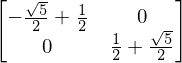

In [37]:
fq = (X.rhs**(-1)*F.rhs*X.rhs).applyfunc(lambda i: i.subs(eigenvals).simplify())
fq

In [39]:
x = symbols('x', positive=True)
assert (fq[0, 0].subs({v[0]:1, v[1]:x}).radsimp() == eigenvals[data[1][0]].radsimp())

## `power` function

In [40]:
f = Function('f')
f_power = define(let=f(z), be=z**r)
f_power

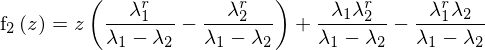

In [41]:
g_power = Hermite_interpolation_polynomial(f_power, eigendata, Phi_polynomials)
g_power

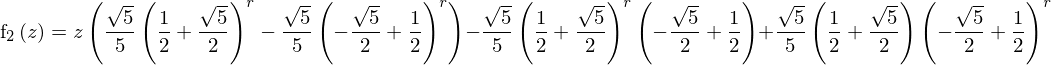

In [42]:
g_power = g_power.subs(eigenvals)
g_power

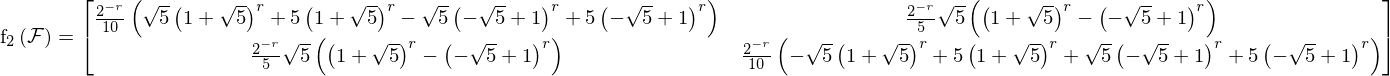

In [43]:
with lift_to_matrix_function(g_power) as G_power:
    m_power = G_power(F)
m_power

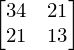

In [44]:
m_power.rhs.subs(eigenvals).subs({r:8}).applyfunc(simplify)

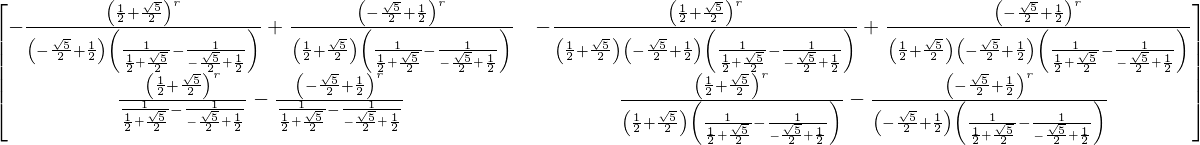

In [45]:
F.rhs**r

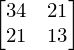

In [46]:
_.subs({r:8}).applyfunc(simplify)

# A multiplicity greater than 1

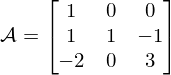

In [48]:
m = define(Symbol(r'\mathcal{A}'), Matrix([
        [1, 0, 0],
        [1, 1, -1],
        [-2, 0, 3],
    ]))
m

In [50]:
eigendata = spectrum(m)
eigendata

In [51]:
data, eigenvals, multiplicities = eigendata.rhs

In [52]:
m_bar = 3 # degree of \Xi minimal polynomial
Phi_poly = Phi_poly_ctor(deg=m_bar-1)
Phi_poly

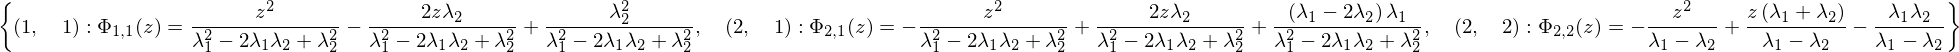

In [53]:
Phi_polynomials = component_polynomials(eigendata)
Phi_polynomials

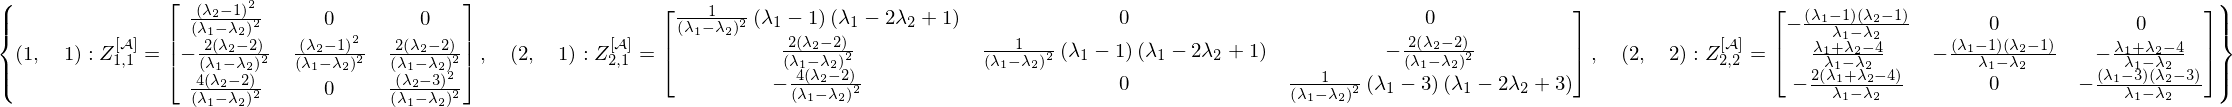

In [54]:
cmatrices = component_matrices(m, Phi_polynomials)
cmatrices

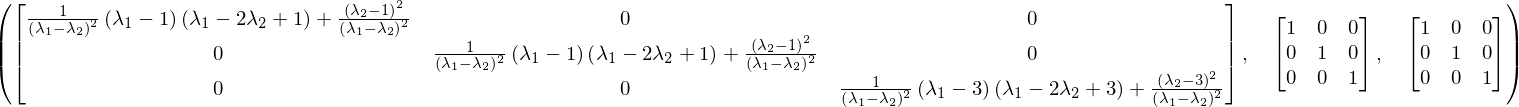

In [57]:
Zi1 = list(cm.rhs.as_immutable() for (i, j), cm in cmatrices.items() if j == 1)

s = zeros(m.rhs.rows)
for Z in Zi1:
    s += Z
s, s.simplify(), s.subs(eigenvals)

## `inverse` function

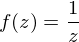

In [58]:
f, h = Function('f'), Function('h')
f_inverse = define(let=f(z), be=1/(z))
f_inverse

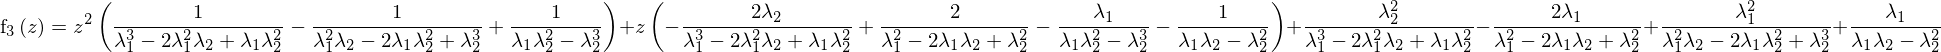

In [59]:
g_inverse = Hermite_interpolation_polynomial(f_inverse, eigendata, Phi_polynomials)
g_inverse

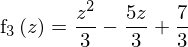

In [60]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

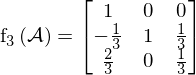

In [61]:
with lift_to_matrix_function(g_inverse) as G_inverse:
    m_inverse = G_inverse(m)
m_inverse

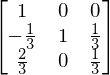

In [62]:
m.rhs**(-1)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.